# CIFAR10  dataset classification

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from IPython.display import Image
print(torch.__version__)

0.4.0


# transform input data 

* torchvision.transforms.CenterCrop(size)
* torchvision.transforms.FiveCrop(size)
* torchvision.transforms.Grayscale(num_output_channels=1)
* torchvision.transforms.Pad(padding, fill=0, padding_mode='constant')


* class torchvision.transforms.Normalize(mean, std)
        Normalize a tensor image with mean and standard deviation. Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input torch.*Tensor i.e. 

input[channel] = (input[channel] - mean[channel]) / std[channel]


see all transform at https://pytorch.org/docs/stable/torchvision/transforms.html 

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

#set class labels

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


load train and test data using data loaders
 
 *    MNIST
 *  Fashion-MNIST
 *  EMNIST
 *  COCO
 *       Captions
 *       Detection
 *   LSUN
 *   ImageFolder
 *   DatasetFolder
 *   Imagenet-12
 *   CIFAR
 *   STL10
 *   SVHN
 *   PhotoTour


In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


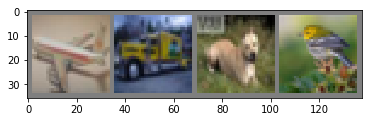

plane truck   dog  bird


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# different layers in pytorch
* torch.nn.Conv1d
* torch.nn.Conv2d
* torch.nn.Conv3d
* torch.nn.ConvTranspose1d
* torch.nn.ConvTranspose2d
* torch.nn.ConvTranspose3d
* torch.nn.MaxPool1d
* torch.nn.MaxUnpool1d
* torch.nn.AvgPool1d
* torch.nn.BatchNorm1d
* torch.nn.RNN
* torch.nn.Dropout
* ...
more in https://pytorch.org/docs/stable/nn.html

In [6]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels= 6,kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2,stride= 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16,kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        myfeature=x
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x 


net = Net()

#run variable on GPU
#net=net.cuda()


![](Picture1.jpg)

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

#         # wrap them in Variable
#         inputs, labels = (inputs), (labels)
        
        #GPU using
        #inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()
        
        #run on gpu
        #inputs=inputs.cuda()
        #labels=labels.cuda()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            

print('Finished Training')

/home/hamim/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  2000] loss: 2.169
[1,  4000] loss: 1.825
[1,  6000] loss: 1.655
[1,  8000] loss: 1.558
[1, 10000] loss: 1.494
[1, 12000] loss: 1.467
Finished Training


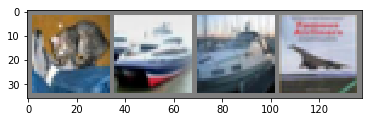

GroundTruth:    cat  ship  ship plane


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
outputs = net(images)

In [11]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [12]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %


In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of ' + classes[i] + "is "+ str(100 * (int(class_correct[i]) / int(class_total[i]))))

Accuracy of planeis 13.3
Accuracy of caris 8.9
Accuracy of birdis 17.2
Accuracy of catis 17.1
Accuracy of deeris 5.0
Accuracy of dogis 14.7
Accuracy of frogis 0.7000000000000001
Accuracy of horseis 23.200000000000003
Accuracy of shipis 0.8
Accuracy of truckis 25.1


# some details about model


In [16]:
a=(net.conv1.weight)
print("conv1 filters : ",a.data.size())

b=(net.fc3.weight)
print("last fully connected layer : ",b.data.size())

conv1 filters :  torch.Size([6, 3, 5, 5])
last fully connected layer :  torch.Size([10, 84])


# save  model

In [15]:
torch.save(net.state_dict(), "model.pth")

# Load model

In [ ]:
my_model = Net()
my_model.load_state_dict(torch.load("model.pth"))
my_model.eval()
